In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os

# Data  preparation

In [2]:
filepath = r'C:\Users\chd\Desktop\data\oakland-crime-statistics-2011-to-2016'

In [3]:
data = pd.read_csv(os.path.join(filepath,'records-for-2016.csv'))

In [4]:
data.head

<bound method NDFrame.head of        Agency              Create Time                 Location Area Id Beat  \
0          OP  2016-01-01T00:00:57.000         ST&MARKET ST          P1  05X   
1          OP  2016-01-01T00:01:25.000       AV&HAMILTON ST          P3  26Y   
2          OP  2016-01-01T00:01:43.000       ST&CHESTNUT ST          P1  02X   
3          OP  2016-01-01T00:01:48.000           WALLACE ST          P2  18Y   
4          OP  2016-01-01T00:02:05.000              90TH AV          P3  34X   
...       ...                      ...                      ...     ...  ...   
110823     OP  2016-07-31T23:45:50.000  WHITMORE ST&WOOD ST          P1  02Y   
110824     OP  2016-07-31T23:50:54.000      WHITTLE 69TH AV          P3  26Y   
110825     OP  2016-07-31T23:56:29.000    WHITTLE LOOMIS CT          P2  19X   
110826     OP  2016-07-31T23:57:31.000       WYMAN LACEY AV          P3  29X   
110827    NaN                      NaN                              NaN  NaN   

        P

In [5]:
attribute = data.columns
print(attribute)

Index(['Agency', 'Create Time', 'Location', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number',
       'Closed Time'],
      dtype='object')


# data summary

In [6]:
nominal = [attribute[i] for i in [0,1,2,3,4,6,7,8,9]]
print('标称属性:',nominal)
numeric = [attribute[i] for i in [5]]
print('数值属性:',numeric)

标称属性: ['Agency', 'Create Time', 'Location', 'Area Id', 'Beat', 'Incident Type Id', 'Incident Type Description', 'Event Number', 'Closed Time']
数值属性: ['Priority']


In [7]:
for a  in numeric:
    n = data[a].shape[0]-1
    split = [int(i*n) for i in [0,0.25,0.5,0.75,1]] 
    data[a] = data[a].fillna(data[a].mean())
    num = [data[a].sort_values().iloc[i]  for i in split]
    print(a+' 五数概括:', num)

Priority 五数概括: [1.0, 2.0, 2.0, 2.0, 2.0]


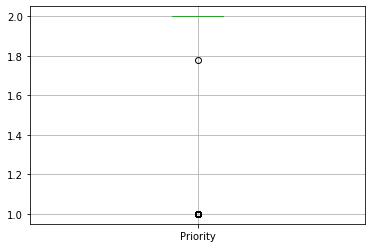

In [9]:
data[numeric].boxplot()  # 盒图

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001808571C548>]],
      dtype=object)

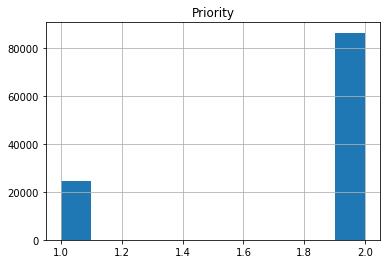

In [10]:
data[numeric].hist() #直方图

# Incomplete (Missing) Data


1  Ignore the tuple

In [12]:
data = pd.read_csv(os.path.join(filepath,'records-for-2016.csv'))
d1 = data.dropna()                        #删除缺失数据

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018083E65C48>]],
      dtype=object)

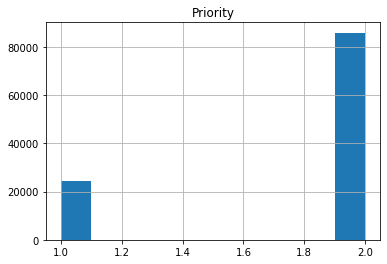

In [13]:
d1[numeric].hist()

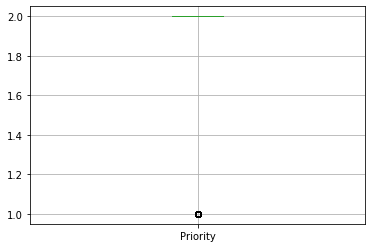

In [14]:
d1[numeric].boxplot()

2、 Replace with the most frequent data

In [17]:
d2 = pd.read_csv(os.path.join(filepath,'records-for-2016.csv'))
for i in range(1,9):
    d2[attribute[i]] = d2[attribute[i]].fillna(value= d2[attribute[i]].value_counts().index[0])  #用最高频率替换

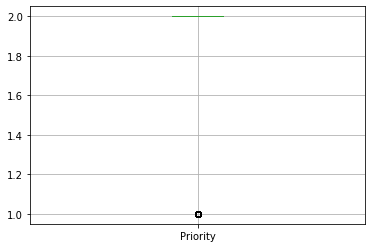

In [18]:
d2[numeric].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001808B87AF88>]],
      dtype=object)

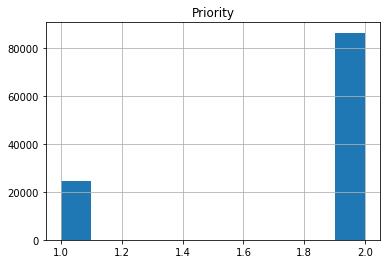

In [19]:
d2[numeric].hist()

3 Replace with related attribute


There are only two numeric attributes so this substitution does not exist


4  Replace with similar data

In [18]:
d4 = pd.read_csv(os.path.join(filepath,'records-for-2016.csv'))   #相似数据替换

123

In [19]:
def sim(x):
    maxsim = 0
    idx = -1
    for i in range(50):
        tmp = 0
        flag = 1
        for j in range(11):
            if x.iloc[j] == d4.iloc[i,j]:
                tmp+=1
        if tmp>maxsim:
            idx = d4.iloc[i]
            maxsim = tmp
        if maxsim>=3:
            break
            
    for i in range(11):
        if pd.isna(x.iloc[j]):
            x.iloc[i] = idx.iloc[i]
    return x

In [28]:
for i in tqdm.tqdm(range(d4.shape[0])):
    x = d4.iloc[i]
    if x.isnull().any():
        simx = sim(x)
        d4.iloc[i] = simx


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 435.50it/s]


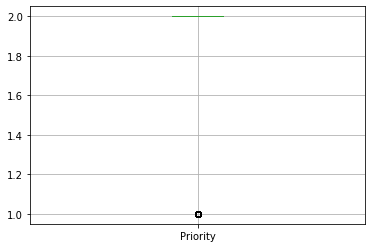

In [20]:
d4[numeric].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BEBFBA7988>]],
      dtype=object)

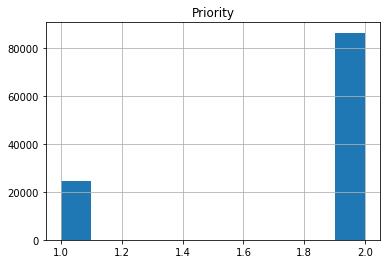

In [21]:
d4[numeric].hist()